In [46]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn

In [47]:
data=pd.read_csv("diabetes_prediction_dataset.csv")

In [48]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [49]:
data['gender'].unique()
data['gender'] = data['gender'].map({"Male":1,"Female":2,"Other":0})

In [50]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [51]:
data['smoking_history'] = data['smoking_history'].map({"never":1,"No Info":2,"current":3,"former":4,"ever":5,"not current":6})

In [52]:
data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.585340,41.885856,0.07485,0.039420,2.306950,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.454501,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,1.000000,10.010000,3.500000,80.000000,0.000000
25%,1.000000,24.000000,0.00000,0.000000,1.000000,23.630000,4.800000,100.000000,0.000000
50%,2.000000,43.000000,0.00000,0.000000,2.000000,27.320000,5.800000,140.000000,0.000000
75%,2.000000,60.000000,0.00000,0.000000,3.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,6.000000,95.690000,9.000000,300.000000,1.000000


In [53]:
data.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.030656,-0.014203,-0.077696,-0.054330,0.022994,-0.019957,-0.017199,-0.037411
age,0.030656,1.000000,0.251171,0.233354,0.143647,0.337396,0.101354,0.110672,0.258008
hypertension,-0.014203,0.251171,1.000000,0.121262,0.031913,0.147666,0.080939,0.084429,0.197823
heart_disease,-0.077696,0.233354,0.121262,1.000000,0.071547,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.054330,0.143647,0.031913,0.071547,1.000000,0.068321,0.023195,0.023031,0.057908
bmi,0.022994,0.337396,0.147666,0.061198,0.068321,1.000000,0.082997,0.091261,0.214357
HbA1c_level,-0.019957,0.101354,0.080939,0.067589,0.023195,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,-0.017199,0.110672,0.084429,0.070066,0.023031,0.091261,0.166733,1.000000,0.419558
diabetes,-0.037411,0.258008,0.197823,0.171727,0.057908,0.214357,0.400660,0.419558,1.000000


In [54]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

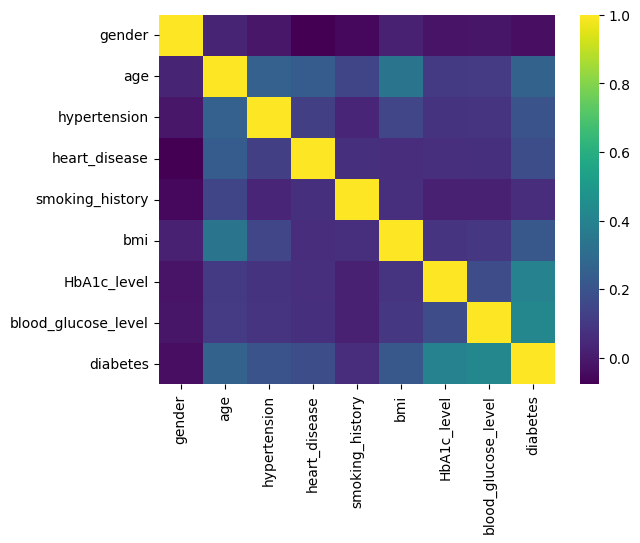

In [55]:
sns.heatmap(data.corr(),cmap='viridis')

In [56]:
data['gender'].unique()

array([2, 1, 0])

In [57]:
data['gender'] = data['gender']

In [58]:
y= data["diabetes"]
data.drop("diabetes", axis=1,inplace=True)
x=data

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
x_test.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')